Synthetic FastMRI Low-Field Dataset.

2020 fastMRI challenge (brain-data)
Training and validation data:

    - "k-space": multi-coil k-space data, dimensions = (slices, coils, heigh, width)

    - "reconstruction_rss": Root-sum-of-squares reconstruction of multi-coil k-space,

    
    cropped to center, dimension = (slices, heigh, width)

Dataset location: `/home/global/mri_datasets/fastmri/brain_multicoil_train/`

Total number of samples: 4469


In [14]:
import mrpro
# from mrpro.algorithms.csm import walsh
import mrpro.data
import torch
import h5py
import mrpro.algorithms
import mrpro.algorithms.csm

In [2]:
sample_file = h5py.File("/home/global/mri_datasets/fastmri/brain_multicoil_train/file_brain_AXT1POST_202_6000491.h5")

In [3]:
k_space = torch.tensor(sample_file["kspace"][:])


In [4]:
# slice (z), coil, width (x), height (y)
k_space.shape

torch.Size([16, 16, 640, 280])

In [5]:
# coil, slice(z), height (y), width (x)
k_space_order = k_space.permute(1, 0, 3, 2)

In [6]:
sample_slice_coil = k_space[2,0]

In [7]:
sample_slice_coil.shape

torch.Size([640, 280])

In [8]:
import matplotlib.pyplot as plt

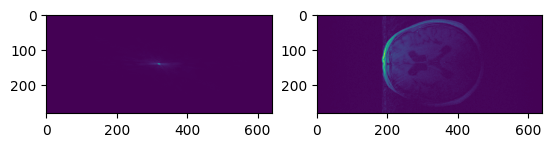

In [9]:
sample_slice_coil = k_space_order[0,0]
plt.subplot(121)
plt.imshow(sample_slice_coil.abs())
plt.subplot(122)
plt.imshow(torch.fft.ifftshift(torch.fft.fftn(torch.fft.fftshift(sample_slice_coil))).abs())

In [10]:
image_space_order = torch.fft.ifftshift(torch.fft.fftn(torch.fft.fftshift(k_space_order, dim=(2,3)), dim=(2,3)), dim=(2,3))

In [11]:
image_space_order.shape

torch.Size([16, 16, 280, 640])

In [12]:
# coils, slice, y, x -> coils, 1, y, x
sample_slice_coil = image_space_order[:,[1],...]
sample_slice_coil.shape

torch.Size([16, 1, 280, 640])

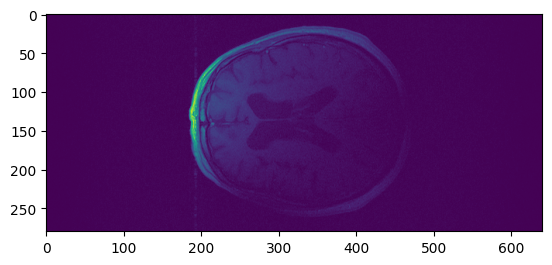

In [13]:
plt.figure()
plt.imshow(sample_slice_coil[0,0].abs())

In [15]:
csm_test = mrpro.algorithms.csm.walsh(sample_slice_coil, 1)

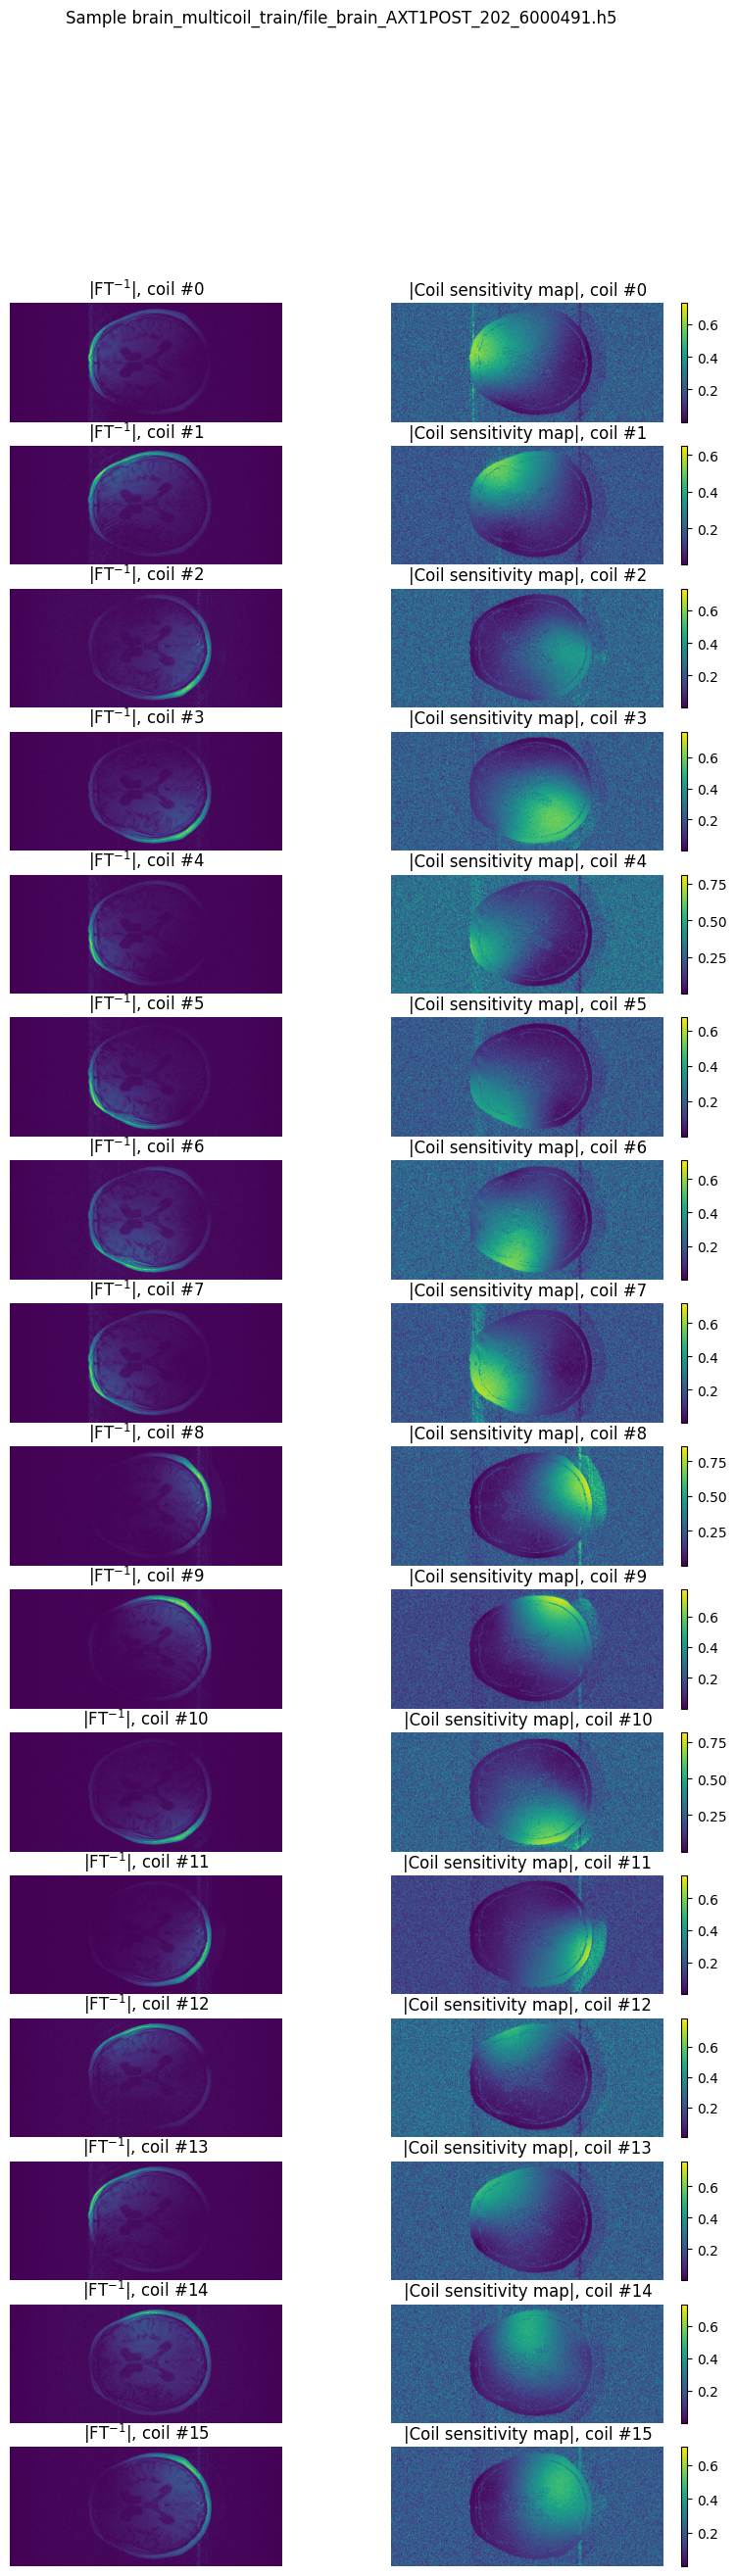

In [17]:
fig = plt.figure(figsize=(10, 30))
fig.suptitle("Sample brain_multicoil_train/file_brain_AXT1POST_202_6000491.h5")
axs = fig.subplots(16,2)
for i, y_ax in enumerate(axs):
    y_ax[0].imshow(image_space_order[i, 0].abs())
    y_ax[0].set_title("|FT$^{-1}$|, coil #%d" % i)
    y_ax[0].axis('off')
    y_ax[1].set_title("|Coil sensitivity map|, coil #%d" % i)
    im = y_ax[1].imshow(csm_test[i,0].abs())
    plt.colorbar(im, ax=y_ax[1])
    y_ax[1].axis('off')
#fig.tight_layout()
#fig.savefig("csm.png", dpi=300, pad_inches="tight")

In [18]:
sum_over_coils = (csm_test.conj()*image_space_order[:,[1],...]).sum(dim=(0,1))

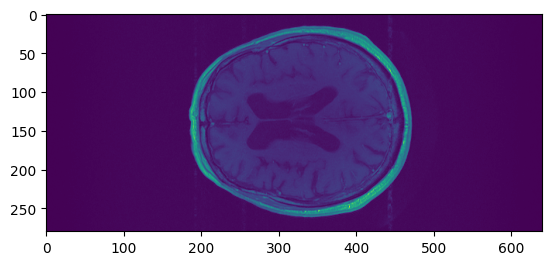

In [19]:
plt.figure()
plt.imshow(sum_over_coils.abs())

In [20]:
rss_recon = k_space = torch.tensor(sample_file["reconstruction_rss"][:])
rss_recon.shape

torch.Size([16, 320, 280])

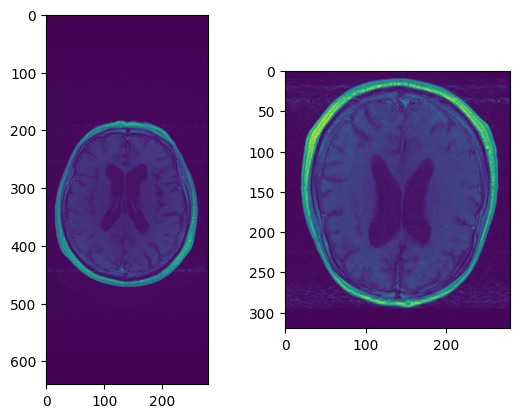

In [24]:
f = plt.figure()
axs = f.subplots(1,2)
axs[0].imshow(sum_over_coils.permute(1,0).abs())
axs[1].imshow(rss_recon[2].abs())